# CLUSTERING
## Uziel Sauñe

In [3]:
import pandas as pd

# 1️⃣ Cargar dataset
df = pd.read_csv("iris.csv")

# 2️⃣ Eliminar columnas irrelevantes (si existen)
# 'Id' no aporta nada y 'Species' solo se usa al final para comparar resultados
cols_drop = [c for c in ["Id", "Species"] if c in df.columns]
df = df.drop(columns=cols_drop)

# 3️⃣ Verificar estructura
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


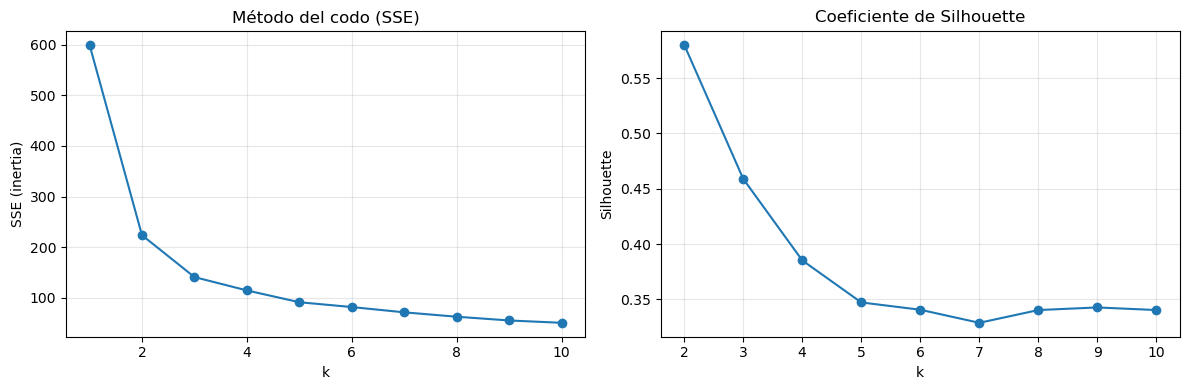

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Asegura que df ya tiene SOLO las 4 columnas numéricas (sin Id ni Species)
X = df.select_dtypes(include=np.number).copy()

# 1) Escalado previo (muy importante para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2) Rango de k y métricas
ks = range(1, 11)
sse, sils = [], []

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    if k == 1:
        sils.append(np.nan)  # silhouette no está definido para k=1
    else:
        labels = kmeans.labels_
        sils.append(silhouette_score(X_scaled, labels))

# 3) Graficar (codo y silhouette)
plt.figure(figsize=(12,4))

# Codo (SSE)
plt.subplot(1,2,1)
plt.plot(list(ks), sse, marker='o')
plt.title('Método del codo (SSE)')
plt.xlabel('k')
plt.ylabel('SSE (inertia)')
plt.grid(True, alpha=0.3)

# Silhouette
plt.subplot(1,2,2)
plt.plot(list(ks), sils, marker='o')
plt.title('Coeficiente de Silhouette')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [5]:
from sklearn.decomposition import PCA
import pandas as pd

# 1️⃣ Aplicar PCA sobre los datos escalados
pca = PCA(n_components=2)
componentes = pca.fit_transform(X_scaled)

# 2️⃣ Crear un DataFrame con las dos componentes principales
datos_2variables = pd.DataFrame(componentes, columns=['PC1', 'PC2'])

# 3️⃣ Mostrar las primeras filas
print(datos_2variables.head())


        PC1       PC2
0 -2.264542  0.505704
1 -2.086426 -0.655405
2 -2.367950 -0.318477
3 -2.304197 -0.575368
4 -2.388777  0.674767


In [6]:
import pandas as pd
from sklearn.decomposition import PCA

# 1️⃣ Aplicar PCA sobre los datos escalados
pca = PCA(n_components=2)
pca.fit(X_scaled)

# 2️⃣ Obtener los nombres de las variables originales
variables = df.columns

# 3️⃣ Calcular los loadings (pesos de cada variable en cada componente)
loadings = pd.DataFrame(
    pca.components_,
    columns=variables,
    index=['PC1', 'PC2']
)

# 4️⃣ Mostrar resultados
print("Loadings de cada variable en las dos componentes principales:")
print(loadings)


Loadings de cada variable en las dos componentes principales:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
PC1       0.522372     -0.263355       0.581254      0.565611
PC2       0.372318      0.925556       0.021095      0.065416


In [7]:
from sklearn.cluster import KMeans

# 1️⃣ Aplicar K-Means sobre los dos componentes principales
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(datos_2variables)

# 2️⃣ Agregar los clusters al DataFrame de los componentes
datos_2variables['cluster'] = clusters

# 3️⃣ Mostrar resultados
print(datos_2variables.head())


        PC1       PC2  cluster
0 -2.264542  0.505704        1
1 -2.086426 -0.655405        1
2 -2.367950 -0.318477        1
3 -2.304197 -0.575368        1
4 -2.388777  0.674767        1


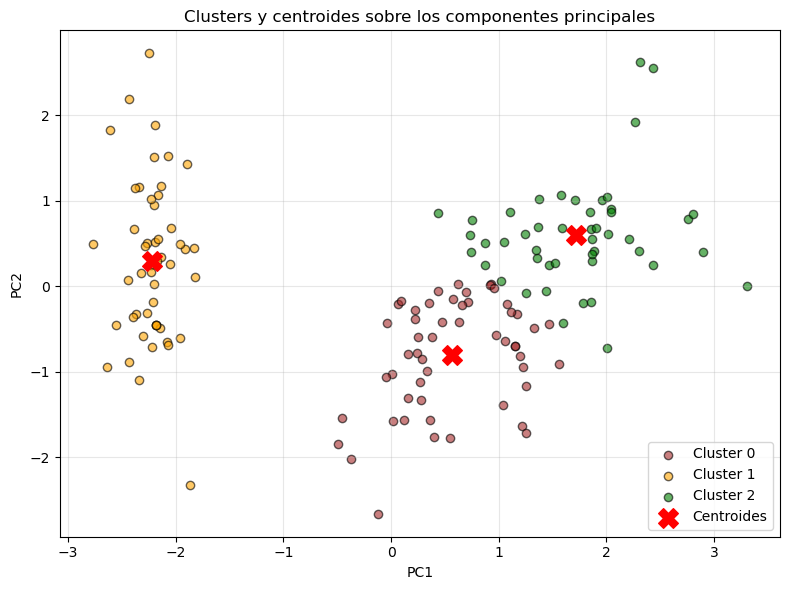

In [8]:
import matplotlib.pyplot as plt

# Asegurar que datos_2variables tiene: ['PC1', 'PC2', 'cluster']
# y que kmeans es el modelo entrenado con esos dos componentes

# 1️⃣ Colores para los clusters
colors = ['brown', 'orange', 'green']

plt.figure(figsize=(8,6))

# 2️⃣ Graficar los puntos por cluster
for i in range(3):  # porque usamos k=3
    puntos = datos_2variables[datos_2variables['cluster'] == i]
    plt.scatter(
        puntos['PC1'], puntos['PC2'],
        c=colors[i], label=f'Cluster {i}', alpha=0.6, edgecolor='k'
    )

# 3️⃣ Graficar los centroides
centroides = kmeans.cluster_centers_
plt.scatter(
    centroides[:, 0], centroides[:, 1],
    c='red', marker='X', s=200, label='Centroides'
)

# 4️⃣ Etiquetas y formato
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters y centroides sobre los componentes principales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [9]:
datos_2variables


,PC1,PC2,cluster
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,1
...,...,...,...
145,1.870522,0.382822,2
146,1.558492,-0.905314,0
147,1.520845,0.266795,2
148,1.376391,1.016362,2


In [11]:
# Diccionario para interpretar los clusters (ajústalo si notas otro orden)
name_map = {
    0: "Versicolor",
    1: "Setosa",
    2: "Virginica"
}

# Agregar columna interpretativa
datos_2variables["Interpretacion"] = datos_2variables["cluster"].map(name_map)

# Mostrar resultados
print(datos_2variables)


          PC1       PC2  cluster Interpretacion
0   -2.264542  0.505704        1         Setosa
1   -2.086426 -0.655405        1         Setosa
2   -2.367950 -0.318477        1         Setosa
3   -2.304197 -0.575368        1         Setosa
4   -2.388777  0.674767        1         Setosa
..        ...       ...      ...            ...
145  1.870522  0.382822        2      Virginica
146  1.558492 -0.905314        0     Versicolor
147  1.520845  0.266795        2      Virginica
148  1.376391  1.016362        2      Virginica
149  0.959299 -0.022284        0     Versicolor

[150 rows x 4 columns]


In [12]:
datos_2variables.to_csv('iris_pca_clusters.csv', index=False)